<a href="https://colab.research.google.com/github/mthimkulu23/SAFE-DRIVE-INSURANCE-/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install xlrd
!pip install pandas

# # # importing pandas package
import pandas as pd
import unicodedata
# reading the excel file
read_data =  pd.read_excel("data.xls")

read_data
print(read_data.shape)
# read_data.info()
# read_data.describe()

# #Check duplicates
# check_duplicates = read_data.duplicated().sum()



# # #Remove exact duplicates
cleaned_data = read_data.drop_duplicates()


cleaned_data.isnull().sum()

# # # #HANDLING MISSING VALUES
# # # see missing values
check_missing = cleaned_data.isnull().sum()









# # # #  Fill missing values(claim dates)
cleaned_data['CLM_DATE'] = cleaned_data['CLM_DATE'].bfill().ffill()



#  Fill missing values(YOJ )
cleaned_data['YOJ'] = cleaned_data['YOJ'].bfill().ffill()


# # #  Fill missing values(INCOME )
cleaned_data['INCOME'] = cleaned_data['INCOME'].bfill().ffill()


# # #  Fill missing values(HOME_VAL)
cleaned_data['HOME_VAL']  = cleaned_data['HOME_VAL'].bfill().ffill()


# # #  Fill missing values(SAMEHOME)
cleaned_data['SAMEHOME']  = cleaned_data['SAMEHOME'].bfill().ffill()


cleaned_data.isnull().sum()










# # # remove accents and lowercase both date columns

cleaned_data ["PLCYDATE_norm"] =  cleaned_data  ["PLCYDATE"].astype(str)
cleaned_data  ["INITDATE_norm"] = cleaned_data  ["INITDATE"].astype(str)
cleaned_data  ["CLM_DATE_norm"] = cleaned_data  ["CLM_DATE"].astype(str)
cleaned_data  ["BIRTH_norm"] = cleaned_data  ["BIRTH"].astype(str)


cleaned_data  ["PLCYDATE_norm"] = cleaned_data  ["PLCYDATE_norm"].apply(lambda x: ''.join(
    c for c in unicodedata.normalize("NFD", x) if unicodedata.category(c) != "Mn"
).lower())

cleaned_data  ["INITDATE_norm"] = cleaned_data  ["INITDATE_norm"].apply(lambda x: ''.join(
    c for c in unicodedata.normalize("NFD", x) if unicodedata.category(c) != "Mn"
).lower())

cleaned_data  ["CLM_DATE_norm"] = cleaned_data  ["CLM_DATE_norm"].apply(lambda x: ''.join(
    c for c in unicodedata.normalize("NFD", x) if unicodedata.category(c) != "Mn"
).lower())

cleaned_data  ["BIRTH_norm"] = cleaned_data  ["BIRTH_norm"].apply(lambda x: ''.join(
    c for c in unicodedata.normalize("NFD", x) if unicodedata.category(c) != "Mn"
).lower())

# # add missing space between number and month
cleaned_data  ["PLCYDATE_clean"] = cleaned_data  ["PLCYDATE_norm"].str.replace(r"(\d+)([a-z]+)", r"\1 \2", regex=True)
cleaned_data  ["INITDATE_clean"] = cleaned_data  ["INITDATE_norm"].str.replace(r"(\d+)([a-z]+)", r"\1 \2", regex=True)
cleaned_data  ["CLM_DATE_clean"] = cleaned_data  ["CLM_DATE_norm"].str.replace(r"(\d+)([a-z]+)", r"\1 \2", regex=True)
cleaned_data  ["BIRTH_clean"] = cleaned_data  ["BIRTH_norm"].str.replace(r"(\d+)([a-z]+)", r"\1 \2", regex=True)



# # translate month names from French to English
m = {
    "janvier":"January", "fevrier":"February", "mars":"March",
    "avril":"April", "mai":"May", "juin":"June", "juillet":"July",
    "aout":"August", "septembre":"September", "octobre":"October",
    "novembre":"November", "decembre":"December"
}

for fr,en in m.items():
   cleaned_data ["PLCYDATE_clean"] = cleaned_data ["PLCYDATE_clean"].str.replace(fr, en, regex=False)
   cleaned_data ["INITDATE_clean"] = cleaned_data ["INITDATE_clean"].str.replace(fr, en, regex=False)
   cleaned_data ["CLM_DATE_clean"] = cleaned_data ["CLM_DATE_clean"].str.replace(fr, en, regex=False)
   cleaned_data ["BIRTH_clean"] = cleaned_data ["BIRTH_clean"].str.replace(fr, en, regex=False)

# # # add missing space before year
cleaned_data ["PLCYDATE_clean"] = cleaned_data ["PLCYDATE_clean"].str.replace(r"([A-Za-z]+)(\d{2})$", r"\1 \2", regex=True)
cleaned_data ["INITDATE_clean"] = cleaned_data ["INITDATE_clean"].str.replace(r"([A-Za-z]+)(\d{2})$", r"\1 \2", regex=True)
cleaned_data ["CLM_DATE_clean"] = cleaned_data ["CLM_DATE_clean"].str.replace(r"([A-Za-z]+)(\d{2})$", r"\1 \2", regex=True)
cleaned_data ["BIRTH_clean"] = cleaned_data ["BIRTH_clean"].str.replace(r"([A-Za-z]+)(\d{2})$", r"\1 \2", regex=True)



# # # final conversion
cleaned_data ["PLCYDATE_dt"] = pd.to_datetime(cleaned_data ["PLCYDATE_clean"], format="%d %B %y", errors="coerce")
cleaned_data ["INITDATE_dt"] = pd.to_datetime(cleaned_data ["INITDATE_clean"], format="%d %B %y", errors="coerce")
cleaned_data ["CLM_DATE_dt"] = pd.to_datetime(cleaned_data ["CLM_DATE_clean"], format="%d %B %y", errors="coerce")
cleaned_data ["BIRTH_dt"] = pd.to_datetime(cleaned_data ["BIRTH_clean"], format="%d %B %y", errors="coerce")

# # # check
cleaned_data [["PLCYDATE", "PLCYDATE_dt", "INITDATE", "INITDATE_dt" , "CLM_DATE" , "CLM_DATE_dt", "BIRTH", "BIRTH_dt" ]].head(10)


(10296, 33)


,PLCYDATE,PLCYDATE_dt,INITDATE,INITDATE_dt,CLM_DATE,CLM_DATE_dt,BIRTH,BIRTH_dt
0,17mars96,1996-03-17,06février90,1990-02-06,11novembre96,1996-11-11,29novembre56,2056-11-29
1,26juillet93,1993-07-26,25aoűt89,1989-08-25,05septembre93,1993-09-05,13avril64,2064-04-13
2,06juin94,1994-06-06,07juin90,1990-06-07,28février95,1995-02-28,04novembre41,2041-11-04
3,19janvier99,1999-01-19,01avril95,1995-04-01,05octobre94,1994-10-05,06février54,2054-02-06
4,18mai99,1999-05-18,19mai95,1995-05-19,05octobre94,1994-10-05,16mars50,2050-03-16
5,28février96,1996-02-28,02mars87,1987-03-02,05octobre94,1994-10-05,19aoűt61,2061-08-19
6,08mai94,1994-05-08,10mai84,1984-05-10,05octobre94,1994-10-05,18juillet39,2039-07-18
7,12octobre97,1997-10-12,27septembre91,1991-09-27,01janvier98,1998-01-01,15juin56,2056-06-15
8,23aoűt97,1997-08-23,25septembre97,1997-09-25,01janvier98,1998-01-01,15juin56,2056-06-15
9,18septembre97,1997-09-18,26septembre93,1993-09-26,01janvier98,1998-01-01,15juin56,2056-06-15


In [2]:
# Split policy date
cleaned_data["PLCY_DAY"] = cleaned_data["PLCYDATE_dt"].dt.day
cleaned_data["PLCY_MONTH"] = cleaned_data["PLCYDATE_dt"].dt.month
cleaned_data["PLCY_YEAR"] = cleaned_data["PLCYDATE_dt"].dt.year

# Split initial date
cleaned_data["INIT_DAY"] = cleaned_data["INITDATE_dt"].dt.day
cleaned_data["INIT_MONTH"] = cleaned_data["INITDATE_dt"].dt.month
cleaned_data["INIT_YEAR"] = cleaned_data["INITDATE_dt"].dt.year

# Split claim date
cleaned_data["CLM_DAY"] = cleaned_data["CLM_DATE_dt"].dt.day
cleaned_data["CLM_MONTH"] = cleaned_data["CLM_DATE_dt"].dt.month
cleaned_data["CLM_YEAR"] = cleaned_data["CLM_DATE_dt"].dt.year

# Split birth date
cleaned_data["BIRTH_DAY"] = cleaned_data["BIRTH_dt"].dt.day
cleaned_data["BIRTH_MONTH"] = cleaned_data["BIRTH_dt"].dt.month
cleaned_data["BIRTH_YEAR"] = cleaned_data["BIRTH_dt"].dt.year

# Check final split dates
cleaned_data[
    [
        "PLCYDATE_dt","PLCY_DAY","PLCY_MONTH","PLCY_YEAR",
        "INITDATE_dt","INIT_DAY","INIT_MONTH","INIT_YEAR",
        "CLM_DATE_dt","CLM_DAY","CLM_MONTH","CLM_YEAR",
        "BIRTH_dt","BIRTH_DAY","BIRTH_MONTH","BIRTH_YEAR"
    ]
].head(10)






#Step 1: Remove $, commas and spaces
cleaned_data["INCOME_CLEAN"] = (
    cleaned_data["INCOME"]
    .astype(str)
    .str.replace("$", "", regex=False)

    .str.strip()
)

# Step 2: Convert to numeric
cleaned_data["INCOME_CLEAN"] = pd.to_numeric(cleaned_data["INCOME_CLEAN"], errors="coerce")

high_income = cleaned_data[cleaned_data["INCOME_CLEAN"] > 300000][["ID", "INCOME_CLEAN"]]
print(high_income.head())


             ID  INCOME_CLEAN
563   147693243        332339
1193   20057040        306277
4249  471037982        320127
6235  637682201        367030
8388  827993198        309628


In [3]:
# Displaying rows those ones who do not have claim date or claim amount

#  not_claimed_amount = cleaned_data[cleaned_data ["CLM_AMT"].isnull() | cleaned_data ["CLM_DATE_dt"].isnull()]
#  not_claimed_amount[["CLM_DATE_dt", "CLM_AMT"]]


#  Displaying rows those ones who have claim date or claim amount

# claimed_amount = cleaned_data [cleaned_data ["CLM_AMT"].notnull() & cleaned_data ["CLM_DATE_dt"].notnull()]
#  claimed_amount[["CLM_DATE_dt", "CLM_AMT"]]



#  Group by car type and count number of claims
#  claims_by_car = cleaned_data.groupby("CAR_TYPE")["CLM_AMT"].count()

#  Find the car type with the highest number of claims
#  highest_claims_car = claims_by_car.idxmax()
#  highest_claims_count = claims_by_car.max()

#  highest_claims_car, highest_claims_count







# Which gender filed the most claims?
#  cleaned_data[cleaned_data["CLM_AMT"].notnull()].groupby("GENDER")["CLM_AMT"].count()






#  What is the most common job class?
#  cleaned_data["JOBCLASS"].mode()

#  What is the distribution of marital status?
# cleaned_data["MARRIED"].value_counts()

#  Find the total number of claims for each CAR_USE category
#  cleaned_data.groupby("CAR_USE")["CLM_AMT"].count()

# Which car type has the lowest number of claims?
#  cleaned_data.groupby("CAR_TYPE")["CLM_AMT"].count().sort_values().head(1)

# How many customers with education level Bachelors
#  cleaned_data[cleaned_data["MAX_EDUC"] == "Bachelors"].shape[0]

# Show all customers who earn more than 50,000
# cleaned_data[cleaned_data["INCOME_CLEAN"] > 50000][["ID", "INCOME_CLEAN"]]




#  What is the highest income in the dataset?
#  cleaned_data["INCOME_CLEAN"].max()

#  What is the total income from all customers?
#  cleaned_data["INCOME_CLEAN"].sum()


#  Show the top 5 total highest income customers
#  grouped = cleaned_data.groupby("ID")["INCOME_CLEAN"].sum()
#  sorted_income = grouped.sort_values(ascending=False)
#  sorted_income.head(5)



#  Show the top 5 total lowest income customers

#  grouped = cleaned_data.groupby("ID", as_index=False)["INCOME_CLEAN"].sum()
#  lowest_income = grouped.sort_values("INCOME_CLEAN", ascending=True).head(5)
#  lowest_income



# Count how many customers earn more than 300,000.
#  (cleaned_data["INCOME"] > 300000).sum()





# Count how many customers earn less than 300,000
(cleaned_data["INCOME_CLEAN"] < 300000).sum()



np.int64(10291)

In [4]:
# Car types with the highest total claim amounts
car_type_claims= (
    cleaned_data[cleaned_data["CLM_AMT"].notnull()].groupby("CAR_TYPE")["CLM_AMT"].count().sort_values(ascending=False)
)
car_type_claims

,CLM_AMT
CAR_TYPE,
SUV,2881
Sedan,2693
Pickup,1772
Sports Car,1176
Van,921
Panel Truck,853


In [7]:
# GENDER TABLE (3NF)
gender_df = (
    cleaned_data[["GENDER"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

# create primary key
gender_df["GENDER_ID"] = gender_df.index + 1

gender_df.head()



# JOBCLASS TABLE
jobclass_df = (
    cleaned_data[["JOBCLASS"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

# create primary key
jobclass_df["JOBCLASS_ID"] = jobclass_df.index + 1

jobclass_df.head()


# JOBCLASS TABLE
jobclass_df = (
    cleaned_data[["JOBCLASS"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

# create primary key
jobclass_df["JOBCLASS_ID"] = jobclass_df.index + 1

jobclass_df.head()


# MAP THE NEW FK COLUMNS BACK INTO MAIN DATAFRAME

# map gender to gender_id
gender_map = dict(zip(gender_df["GENDER"], gender_df["GENDER_ID"]))
cleaned_data["GENDER_ID"] = cleaned_data["GENDER"].map(gender_map)

# map jobclass to jobclass_id
jobclass_map = dict(zip(jobclass_df["JOBCLASS"], jobclass_df["JOBCLASS_ID"]))
cleaned_data["JOBCLASS_ID"] = cleaned_data["JOBCLASS"].map(jobclass_map)


#CREATE customer TABLE (3NF)
customer_cols = [
    "ID",            # PK
    "AGE",
    "MAX_EDUC",
    "PARENT1",
    "MARRIED",
    "HOME_VAL",
    "BIRTH_dt",
    "GENDER_ID",     # FK
    "JOBCLASS_ID"    # FK
]

customer_df = (
    cleaned_data[customer_cols]
    .drop_duplicates()
    .reset_index(drop=True)
)

customer_df.head()




,ID,AGE,MAX_EDUC,PARENT1,MARRIED,HOME_VAL,BIRTH_dt,GENDER_ID,JOBCLASS_ID
0,100058542,41-60,<High School,No,Yes,$123721,2056-11-29,1,1
1,100093408,25-40,High School,Yes,No,$0,2064-04-13,1,2
2,100208113,41-60,Masters,No,No,$0,2041-11-04,1,3
3,100237269,41-60,High School,No,Yes,$0,2054-02-06,2,2
4,10042968,41-60,High School,No,Yes,$288808,2050-03-16,2,4


In [8]:
#  CREATE CAR_TYPE TABLE (3NF)

car_type_df = (
    cleaned_data[["CAR_TYPE", "RED_CAR", "CAR_USE"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

# PK CAR_TYPE_ID
car_type_df["CAR_TYPE_ID"] = car_type_df.index + 1

car_type_df.head()


car_type_map = dict(zip(car_type_df["CAR_TYPE"], car_type_df["CAR_TYPE_ID"]))
cleaned_data["CAR_TYPE_ID"] = cleaned_data["CAR_TYPE"].map(car_type_map)






In [9]:
# CREATE POLICY TABLE (3NF)

policy_cols = [
    "POLICYNO",       # PK
    "PLCYDATE_dt",
    "INITDATE_dt",
    "RETAINED",
    "KIDSDRIV",
    "TRAVTIME",
    "MVR_PTS",
    "CAR_TYPE_ID",    # FK
    "ID"              # FK to CUSTOMER
]

policy_df = (
    cleaned_data[policy_cols]
    .drop_duplicates()
    .reset_index(drop=True)
)

policy_df.head()


,POLICYNO,PLCYDATE_dt,INITDATE_dt,RETAINED,KIDSDRIV,TRAVTIME,MVR_PTS,CAR_TYPE_ID,ID
0,36292520,1996-03-17,1990-02-06,6,0,17,0,15,100058542
1,31958061,1993-07-26,1989-08-25,4,0,18,4,16,100093408
2,42433312,1994-06-06,1990-06-07,4,0,47,0,17,100208113
3,49896544,1999-01-19,1995-04-01,4,0,31,0,21,100237269
4,79298192,1999-05-18,1995-05-19,4,0,14,2,15,10042968


In [10]:
#  CAR_TYPE TABLE (3NF)
car_type_cols = [
    "RED_CAR",
    "CAR_USE"
]

car_type_df = (
    cleaned_data[car_type_cols]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Create PK
car_type_df["CAR_TYPE_ID"] = car_type_df.index + 1

# Reorder columns
car_type_df = car_type_df[["CAR_TYPE_ID"] + car_type_cols]

car_type_df.head()



#  CAR_USED TABLE (3NF)
car_used_cols = [
    "POLICYNO"
]

car_used_df = (
    cleaned_data[car_used_cols]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Create PK
car_used_df["CAR_USED_ID"] = car_used_df.index + 1

# Reorder
car_used_df = car_used_df[["CAR_USED_ID"] + car_used_cols]

car_used_df.head()

,CAR_USED_ID,POLICYNO
0,1,36292520
1,2,31958061
2,3,42433312
3,4,49896544
4,5,79298192


In [11]:
#  CLAIMS TABLE 3NF
claims_cols = [
    "CLM_DATE_dt",
    "OLDCLAIM",
    "CLM_AMT",
    "CLM_FREQ",
    "POLICYNO"
]

claims_df = (
    cleaned_data[claims_cols]
    .drop_duplicates()
    .reset_index(drop=True)
)

# Add the PK
claims_df["CLAIMID"] = claims_df.index + 1

# Reorder
claims_df = claims_df[["CLAIMID"] + claims_cols]

claims_df.head()


# cleaned_data.to_csv("remove_null_Data2.csv", index=False)

,CLAIMID,CLM_DATE_dt,OLDCLAIM,CLM_AMT,CLM_FREQ,POLICYNO
0,1,1996-11-11,$0,$3336,0,36292520
1,2,1993-09-05,$0,$5583,0,31958061
2,3,1995-02-28,$5705,$39104,2,42433312
3,4,1994-10-05,$0,$0,0,49896544
4,5,1994-10-05,$6980,$0,2,79298192


Bachelors count: 2822


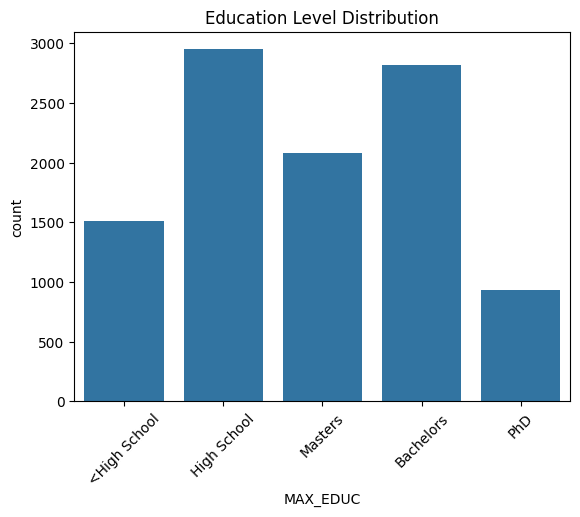

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns




# Q1  How many customers with education level Bachelors?
bachelors_count = cleaned_data[cleaned_data["MAX_EDUC"] == "Bachelors"].shape[0]
print("Bachelors count:", bachelors_count)

sns.countplot(x=cleaned_data["MAX_EDUC"])
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.show()


In [13]:

# Dictionary mapping French months to English
french_to_english_months = {
    "janvier": "January",
    "février": "February",
    "mars": "March",
    "avril": "April",
    "mai": "May",
    "juin": "June",
    "juillet": "July",
    "août": "August",
    "septembre": "September",
    "octobre": "October",
    "novembre": "November",
    "décembre": "December"
}

# Function to convert French date text → English → datetime
def convert_french_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    # Replace month names
    for fr, en in french_to_english_months.items():
        if fr in str(date_str).lower():
            date_str = date_str.lower().replace(fr, en)
    # Convert to datetime
    return pd.to_datetime(date_str, errors="coerce", dayfirst=True)

# APPLY THE CLEANER
# Create cleaned claim date column
cleaned_data["CLM_DATE_dt"] = cleaned_data["CLM_DATE"].apply(convert_french_date)

# Create cleaned policy date column
cleaned_data["PLCYDATE_dt"] = cleaned_data["PLCYDATE"].apply(convert_french_date)






# Q2  Display rows where both claim amount and claim date exist
valid_claims = cleaned_data[
    cleaned_data["CLM_AMT"].notna() &
    cleaned_data["CLM_DATE_dt"].notna() &
    cleaned_data["PLCYDATE_dt"].notna()
]

print(valid_claims.head())

          ID  KIDSDRIV     PLCYDATE  TRAVTIME     CAR_USE  POLICYNO BLUEBOOK  \
0  100058542         0     17mars96        17     Private  36292520   $9860    
1  100093408         0  26juillet93        18     Private  31958061   $1500    
2  100208113         0     06juin94        47  Commercial  42433312  $30460    
3  100237269         0  19janvier99        31     Private  49896544  $16580    
4   10042968         0      18mai99        14  Commercial  79298192  $23030    

      INITDATE  RETAINED  NPOLICY  ... CLM_DAY CLM_MONTH CLM_YEAR  BIRTH_DAY  \
0  06février90         6        2  ...      11        11     1996         29   
1     25aoűt89         4        2  ...       5         9     1993         13   
2     07juin90         4        1  ...      28         2     1995          4   
3    01avril95         4        2  ...       5        10     1994          6   
4      19mai95         4        1  ...       5        10     1994         16   

  BIRTH_MONTH  BIRTH_YEAR INCOME_CLEAN

Claims per car type:
 CAR_TYPE
SUV            2881
Sedan          2693
Pickup         1772
Sports Car     1176
Van             921
Panel Truck     853
Name: count, dtype: int64


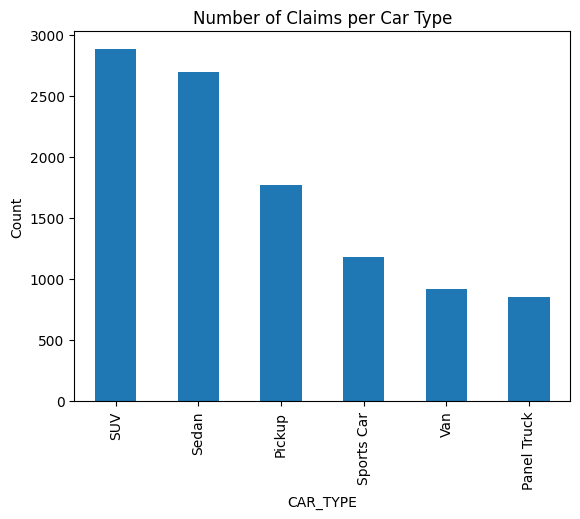

In [14]:
# Q3  Which car type has the highest number of claims?
car_claims = cleaned_data["CAR_TYPE"].value_counts()
print("Claims per car type:\n", car_claims)

car_claims.plot(kind="bar")
plt.title("Number of Claims per Car Type")
plt.ylabel("Count")
plt.show()


In [15]:
# Q4  How many claims were made by Sedan vehicles?
sedan_claims = car_claims.get("Sedan", 0)
print("Sedan claims:", sedan_claims)

Sedan claims: 2693


GENDER
F    5540
M    4756
Name: count, dtype: int64


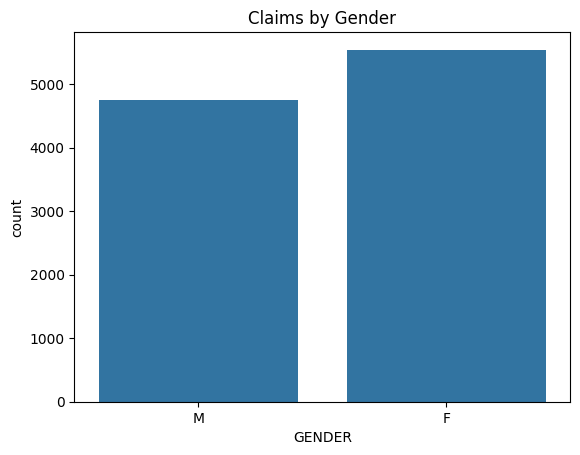

In [16]:
# Q5  Which gender filed the most claims?
gender_claims = cleaned_data["GENDER"].value_counts()
print(gender_claims)

sns.countplot(x=cleaned_data["GENDER"])
plt.title("Claims by Gender")
plt.show()


Most common job class:
 JOBCLASS
Blue Collar     2288
Clerical        1588
Professional    1409
Manager         1257
Lawyer          1031
Student          896
Home Maker       841
Doctor           321
Name: count, dtype: int64


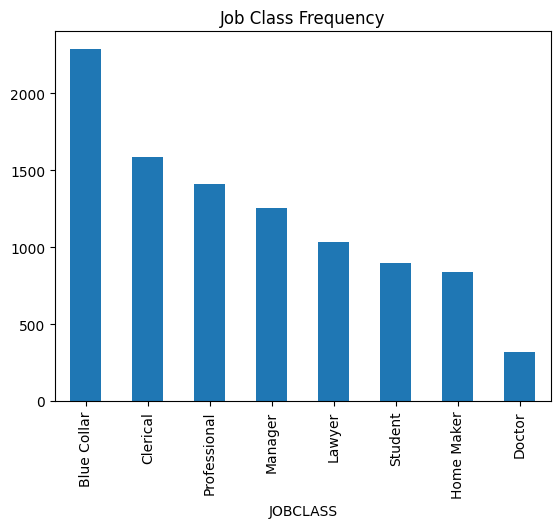

In [17]:
# Q6  Most common job class
job_class = cleaned_data["JOBCLASS"].value_counts()
print("Most common job class:\n", job_class)

job_class.plot(kind="bar")
plt.title("Job Class Frequency")
plt.show()

MARRIED
Yes    6187
No     4109
Name: count, dtype: int64


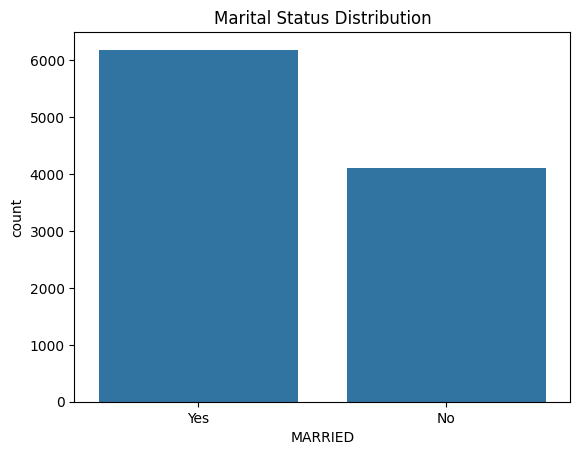

In [18]:
# Q7  Distribution of marital status
marital_stats = cleaned_data["MARRIED"].value_counts()
print(marital_stats)

sns.countplot(x=cleaned_data["MARRIED"])
plt.title("Marital Status Distribution")
plt.show()


CAR_USE
Private       6507
Commercial    3789
Name: count, dtype: int64


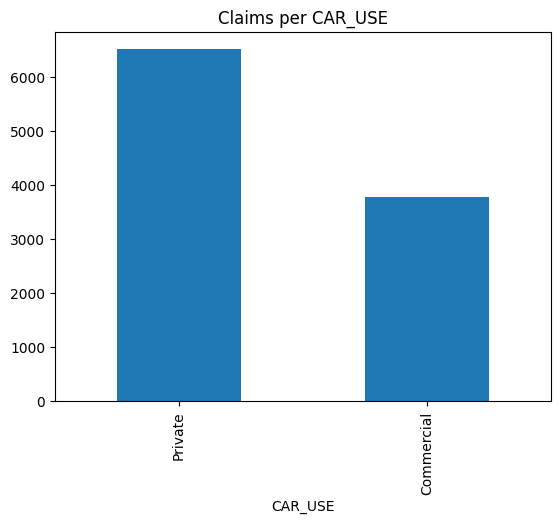

In [19]:
# Q8  Total claims per CAR_USE
car_use_claims = cleaned_data["CAR_USE"].value_counts()
print(car_use_claims)

car_use_claims.plot(kind="bar")
plt.title("Claims per CAR_USE")
plt.show()

In [20]:
# Q9  Car type with lowest claims
lowest_car_type = car_claims.idxmin()
print("Lowest claims car type:", lowest_car_type)

Lowest claims car type: Panel Truck


In [21]:
# Q10 – Customers earning more than 300,000
high_income = cleaned_data[cleaned_data["INCOME_CLEAN"] > 300000][["ID", "INCOME_CLEAN"]]

print(high_income.sort_values("INCOME_CLEAN", ascending=False).head(10))


             ID  INCOME_CLEAN
6235  637682201        367030
563   147693243        332339
4249  471037982        320127
8388  827993198        309628
1193   20057040        306277


In [22]:
# Q11  Highest income
total_income = cleaned_data["INCOME_CLEAN"].max()
print("Total income:", total_income)

Total income: 367030


In [23]:
# Q12  Total income
total_income = cleaned_data["INCOME_CLEAN"].sum()
print("Total income:", total_income)


Total income: 632712006


In [24]:
# Q13  Top 5 income customers
top5_income = cleaned_data.sort_values("INCOME_CLEAN", ascending=False)[["ID", "INCOME_CLEAN"]].head(5)
print(top5_income)

             ID  INCOME_CLEAN
6235  637682201        367030
563   147693243        332339
4249  471037982        320127
8388  827993198        309628
1193   20057040        306277


In [25]:
# Q14  Lowest 5 income customers
lowest5_income = cleaned_data.sort_values("INCOME_CLEAN")[["ID", "INCOME_CLEAN"]].head(5)
print(lowest5_income)

             ID  INCOME_CLEAN
4643  503597559             0
7037  707579394             0
7070  710348768             0
7675  761295422             0
675   157610837             0


In [26]:
# # # # Q15 — Count income > 300,000

# above_300k = cleaned_data[cleaned_data["INCOME_CLEAN"] > 300000].shape[0]
# print("Customers earning > 300k:", above_300k)




# # Filter customers earning more than 300,000
above_300k_df = cleaned_data[cleaned_data["INCOME_CLEAN"] > 300000][["ID", "INCOME_CLEAN"]]

# Sort from highest → lowest (ascending) to match Excel
above_300k_df = above_300k_df.sort_values(by="INCOME_CLEAN", ascending=False)

# Display the 5 customers
print(above_300k_df)

# Calculate total income for these customers
total_income_above_300k = above_300k_df["INCOME_CLEAN"].sum()
print("\nGrand Total:", total_income_above_300k)

             ID  INCOME_CLEAN
6235  637682201        367030
563   147693243        332339
4249  471037982        320127
8388  827993198        309628
1193   20057040        306277

Grand Total: 1635401


In [27]:
# Q16 — Count income < 300,000
below_300k = cleaned_data[cleaned_data["INCOME_CLEAN"] < 300000].shape[0]
print("Customers earning < 300k:", below_300k)

Customers earning < 300k: 10291


In [28]:
# Identify the Latest Claim Date
latest_claim_date = cleaned_data["CLM_DATE_dt"].max()
print("Latest claim date:", latest_claim_date)

Latest claim date: 2000-03-07 00:00:00


In [29]:
# Show WHO claimed on the latest date
latest_claims = cleaned_data[cleaned_data["CLM_DATE_dt"] == latest_claim_date][["ID", "CLM_AMT", "CLM_DATE_dt"]]
print(latest_claims)

             ID  CLM_AMT CLM_DATE_dt
3323  385226708      $0   2000-03-07
3324  385591442      $0   2000-03-07
3325  385761061  $20126   2000-03-07


In [30]:
# Add Season Column
cleaned_data["SEASON"] = cleaned_data["CLM_DATE_dt"].dt.month

cleaned_data["SEASON"] = cleaned_data["SEASON"].apply(
    lambda m: "Summer" if m in [12,1,2] else
              "Autumn" if m in [3,4,5] else
              "Winter" if m in [6,7,8] else
              "Spring"
)

# Show which SEASON has the most claims
season_counts = cleaned_data["SEASON"].value_counts()
print(season_counts)

# Find customers with the MOST claims
top_claims = (
    cleaned_data.groupby("ID")["CLM_AMT"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print(top_claims)

SEASON
Spring    3623
Autumn    2573
Summer    2437
Winter    1663
Name: count, dtype: int64
ID
341162899    5
747557690    5
173124759    5
632067262    5
634343179    4
291961707    4
430554774    4
750731752    4
132609655    4
846904796    4
Name: CLM_AMT, dtype: int64
